Analysing my own covariance matrix created with CosmoSIS

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import astropy.io.fits as fits
#from astropy import units as u
#from astropy import constants as const

%matplotlib inline 
#for jupyter notebook

In [17]:
filename = "6x2pt_WFIRST_SO_gaussian.fits"

hdul = fits.open(filename)
print(hdul.info())
cov = hdul[1].data

Filename: 6x2pt_WFIRST_SO_gaussian.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU       4   ()      
  1  COVMAT        1 ImageHDU        21   (2360, 2360)   float64   
  2  shear_cl      1 BinTableHDU     28   1100R x 5C   [K, K, K, D, D]   
  3  galaxy_shear_cl    1 BinTableHDU     28   640R x 5C   [K, K, K, D, D]   
  4  galaxy_cl     1 BinTableHDU     28   200R x 5C   [K, K, K, D, D]   
  5  shear_cmbkappa_cl    1 BinTableHDU     28   200R x 5C   [K, K, K, D, D]   
  6  galaxy_cmbkappa_cl    1 BinTableHDU     28   200R x 5C   [K, K, K, D, D]   
  7  cmbkappa_cl    1 BinTableHDU     28   20R x 5C   [K, K, K, D, D]   
  8  nz_source     1 BinTableHDU     36   320R x 13C   [D, D, D, D, D, D, D, D, D, D, D, D, D]   
  9  nz_lens       1 BinTableHDU     36   320R x 13C   [D, D, D, D, D, D, D, D, D, D, D, D, D]   
None


In [18]:
cov_log = np.log10(cov)


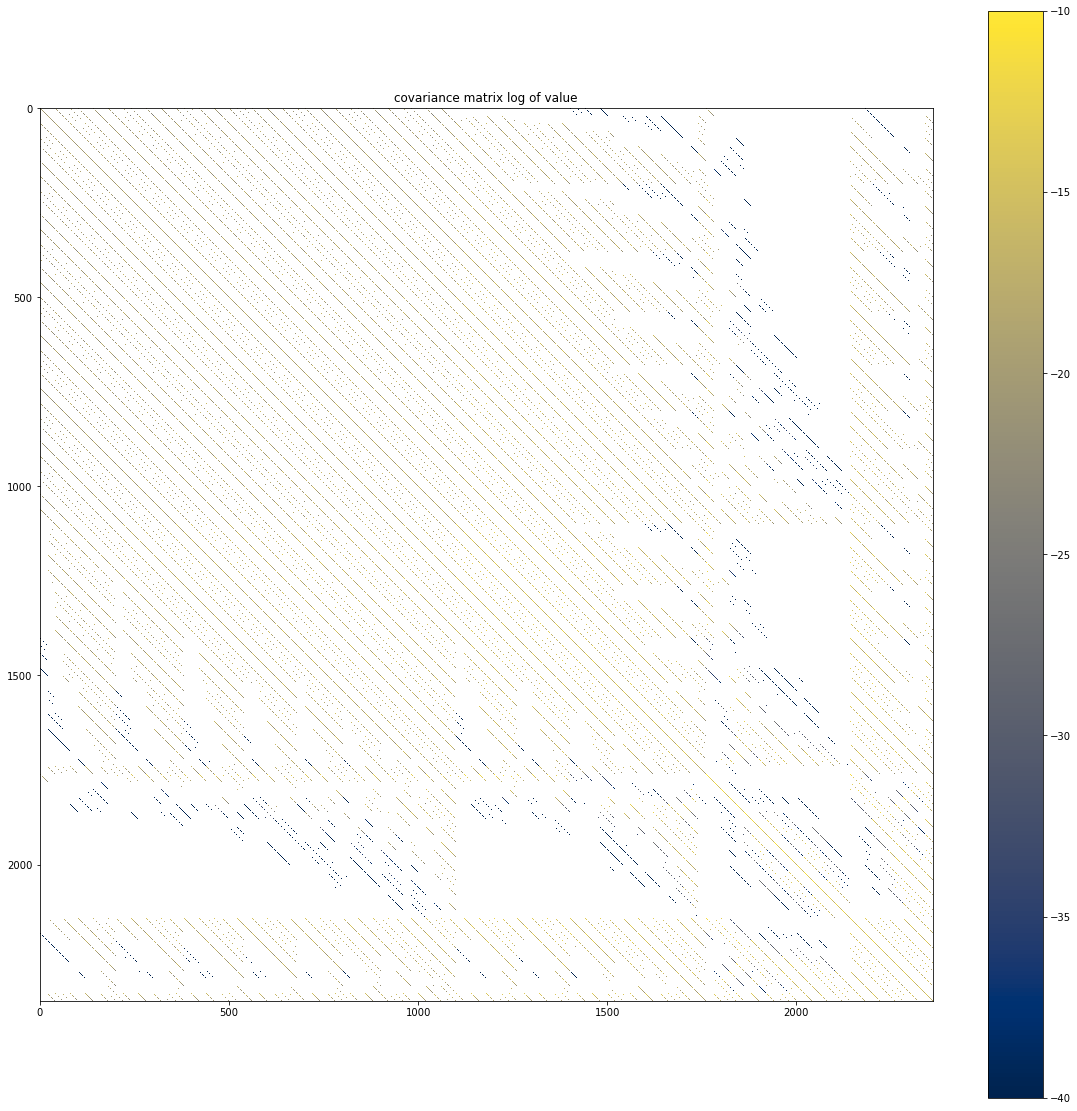

In [19]:
plt.figure(figsize=(20,20))
#plt.matshow(cov_log, interpolation='nearest')
plt.imshow(cov_log, interpolation='nearest', cmap="cividis")

plt.colorbar()
plt.title("covariance matrix log of value")
plt.clim(-40,-10)
##plt.savefig("cosmolike_interface/cov.pdf")
##plt.savefig("covariance_gaussian_test.svg")

In [20]:
np.allclose(cov, cov.T, rtol=1e-10)

True

In [21]:
np.linalg.cholesky(cov)

array([[1.02765453e-09, 0.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [0.00000000e+00, 7.27245771e-10, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [0.00000000e+00, 0.00000000e+00, 5.17074546e-10, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       ...,
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        3.31363474e-09, 0.00000000e+00, 0.00000000e+00],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 2.94213738e-09, 0.00000000e+00],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 2.61452573e-09]])

In [22]:
np.linalg.slogdet(cov)

(1.0, -94808.42839390022)

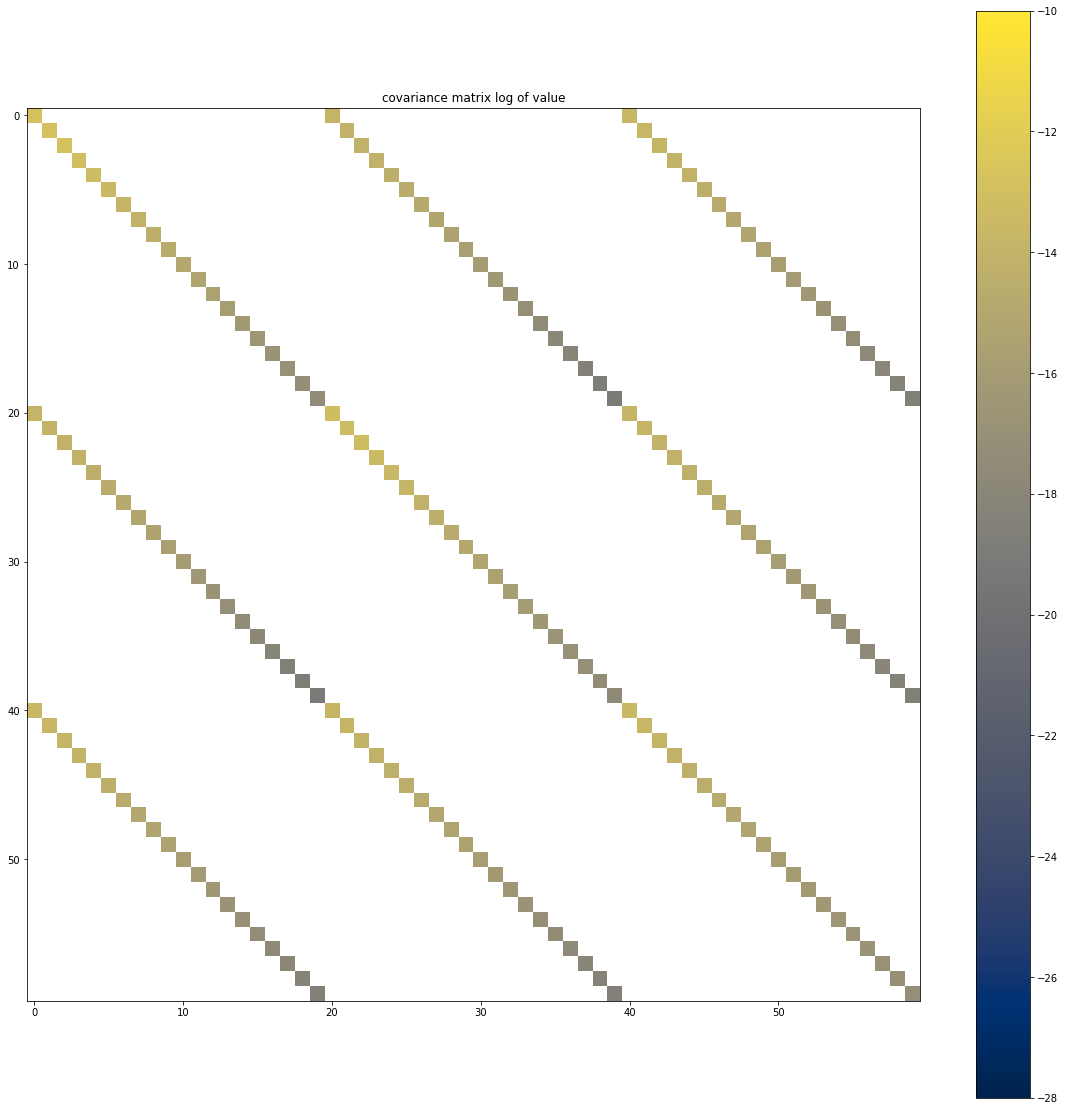

In [23]:
plt.figure(figsize=(20,20))
#plt.matshow(cov_log, interpolation='nearest')
plt.imshow(cov_log[-60:,-60:], interpolation='nearest', cmap="cividis")

plt.colorbar()
plt.title("covariance matrix log of value")
plt.clim(-28,-10)
##plt.savefig("cosmolike_interface/cov.pdf")
##plt.savefig("covariance_gaussian_test.svg")

In [24]:
cov_log[-60:,-60:]

array([[-12.75775721,         -inf,         -inf, ...,         -inf,
                -inf,         -inf],
       [        -inf, -12.83359127,         -inf, ...,         -inf,
                -inf,         -inf],
       [        -inf,         -inf, -12.9400778 , ...,         -inf,
                -inf,         -inf],
       ...,
       [        -inf,         -inf,         -inf, ..., -16.91310421,
                -inf,         -inf],
       [        -inf,         -inf,         -inf, ...,         -inf,
        -17.03103659,         -inf],
       [        -inf,         -inf,         -inf, ...,         -inf,
                -inf, -17.14364696]])